In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [29]:
df=pd.read_csv("/StudentsPerformance.csv")

In [30]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [31]:
df.shape

(1000, 8)

In [32]:
df.isnull().sum()

,0
gender,0
race/ethnicity,0
parental level of education,0
lunch,0
test preparation course,0
math score,0
reading score,0
writing score,0


In [33]:
df.duplicated().sum()

0

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [35]:
df.nunique()

,0
gender,2
race/ethnicity,5
parental level of education,6
lunch,2
test preparation course,2
math score,81
reading score,72
writing score,77


In [36]:
print("Categories in 'gender' variable:  ",end=" ")
print(df["gender"].unique())

print("Categories in 'race/ethnicity' variable:  ",end=" ")
print(df["race/ethnicity"].unique())

print("Categories in 'parental level of education' variable:  ",end=" ")
print(df["parental level of education"].unique())

print("Categories in 'lunch' variable:  ",end=" ")
print(df["lunch"].unique())

print("Categories in 'test preparation course' variable:  ",end=" ")
print(df["test preparation course"].unique())

Categories in 'gender' variable:   ['female' 'male']
Categories in 'race/ethnicity' variable:   ['group B' 'group C' 'group A' 'group D' 'group E']
Categories in 'parental level of education' variable:   ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
Categories in 'lunch' variable:   ['standard' 'free/reduced']
Categories in 'test preparation course' variable:   ['none' 'completed']


In [37]:
numeric_features = [feature for feature in df.columns if df[feature].dtype != 'O']
categorical_features = [feature for feature in df.columns if df[feature].dtype == 'O']


print('We have {} numerical features : {}'.format(len(numeric_features), numeric_features))
print('\nWe have {} categorical features : {}'.format(len(categorical_features), categorical_features))

We have 3 numerical features : ['math score', 'reading score', 'writing score']

We have 5 categorical features : ['gender', 'race/ethnicity', 'parental level of education', 'lunch', 'test preparation course']


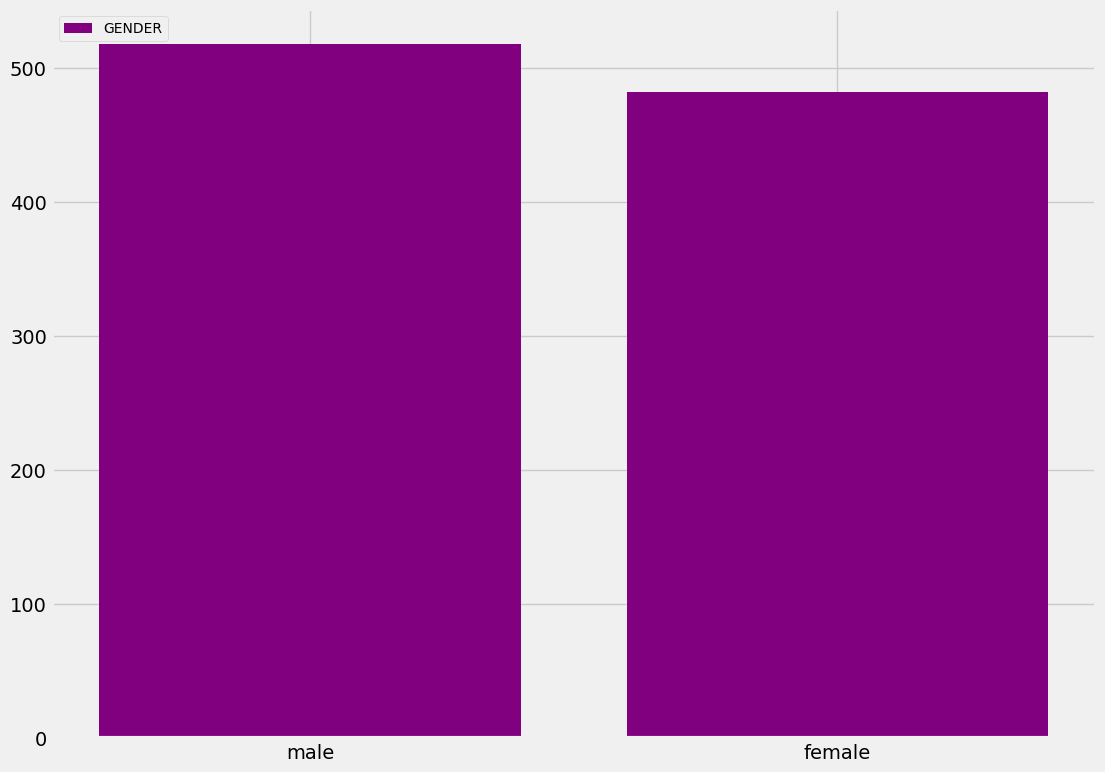

In [38]:
x=["male","female"]
y= [count for count in df["gender"].value_counts()]
plt.bar(x,y,label="GENDER",color="purple")
plt.legend(loc=2,fontsize=10)
plt.show()

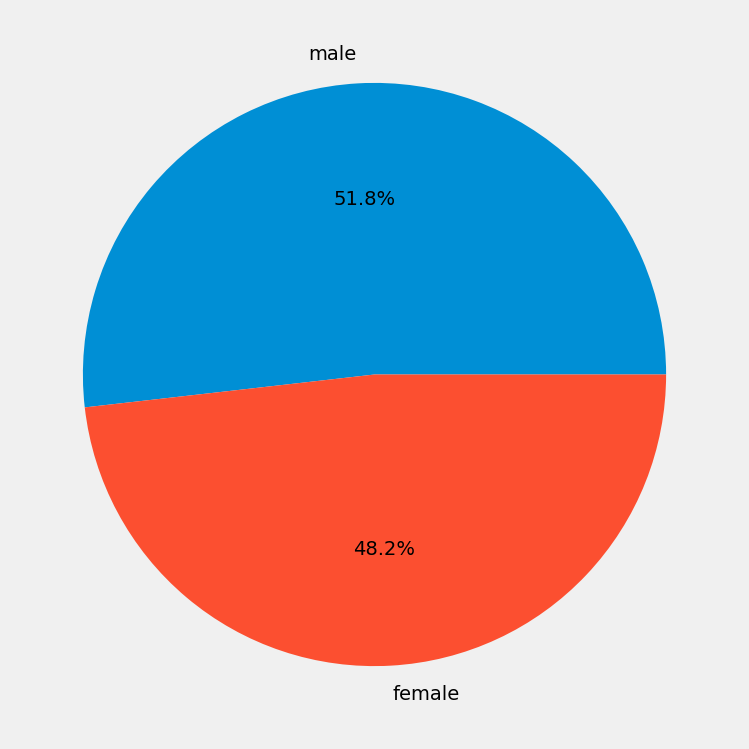

In [39]:
x=["male","female"]
y= [count for count in df["gender"].value_counts()]
plt.pie(y,labels=x,autopct='%1.1f%%')
plt.show()

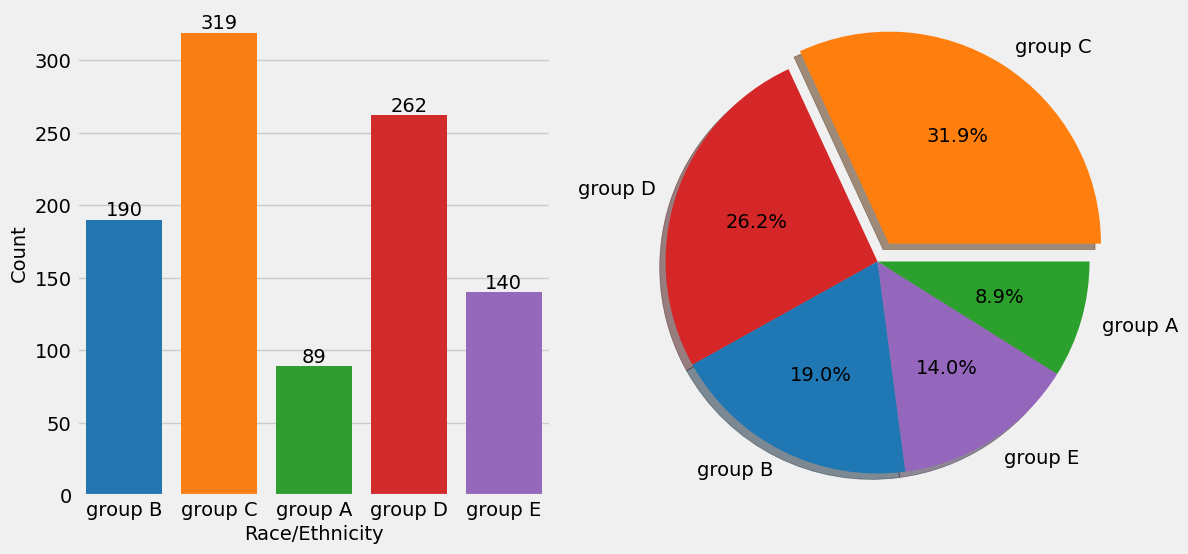

In [40]:

colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd']

f, ax = plt.subplots(1, 2, figsize=(12, 6))

sns.countplot(x=df['race/ethnicity'], data=df, palette=colors, ax=ax[0], saturation=0.95)
for container in ax[0].containers:
    ax[0].bar_label(container, color='black', size=14)

ax[0].set_xlabel('Race/Ethnicity', fontsize=14)
ax[0].set_ylabel('Count', fontsize=14)
ax[0].tick_params(labelsize=14)

color_dict = dict(zip(df['race/ethnicity'].unique(), colors))

pie_colors = [color_dict[race] for race in df['race/ethnicity'].value_counts().index]

plt.pie(x=df['race/ethnicity'].value_counts(), labels=df['race/ethnicity'].value_counts().index, explode=[0.1, 0, 0, 0, 0], autopct='%1.1f%%', shadow=True, colors=pie_colors, textprops={'fontsize': 14})

plt.axis('equal')

plt.show()

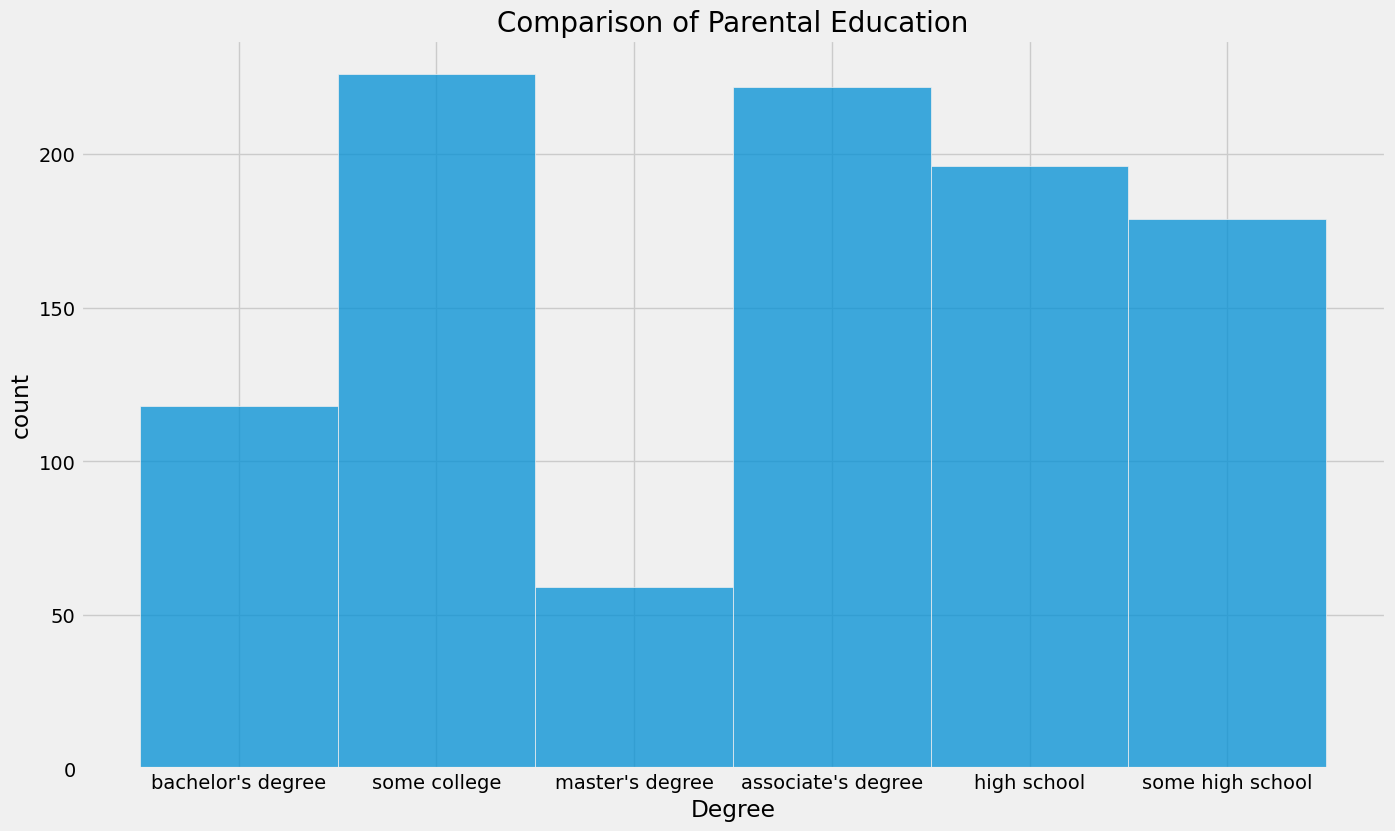

In [41]:
plt.rcParams['figure.figsize'] = (15, 9)
plt.style.use('fivethirtyeight')
sns.histplot(df["parental level of education"], palette = 'Blues')
plt.title('Comparison of Parental Education', fontweight = 30, fontsize = 20)
plt.xlabel('Degree')
plt.ylabel('count')
plt.show()

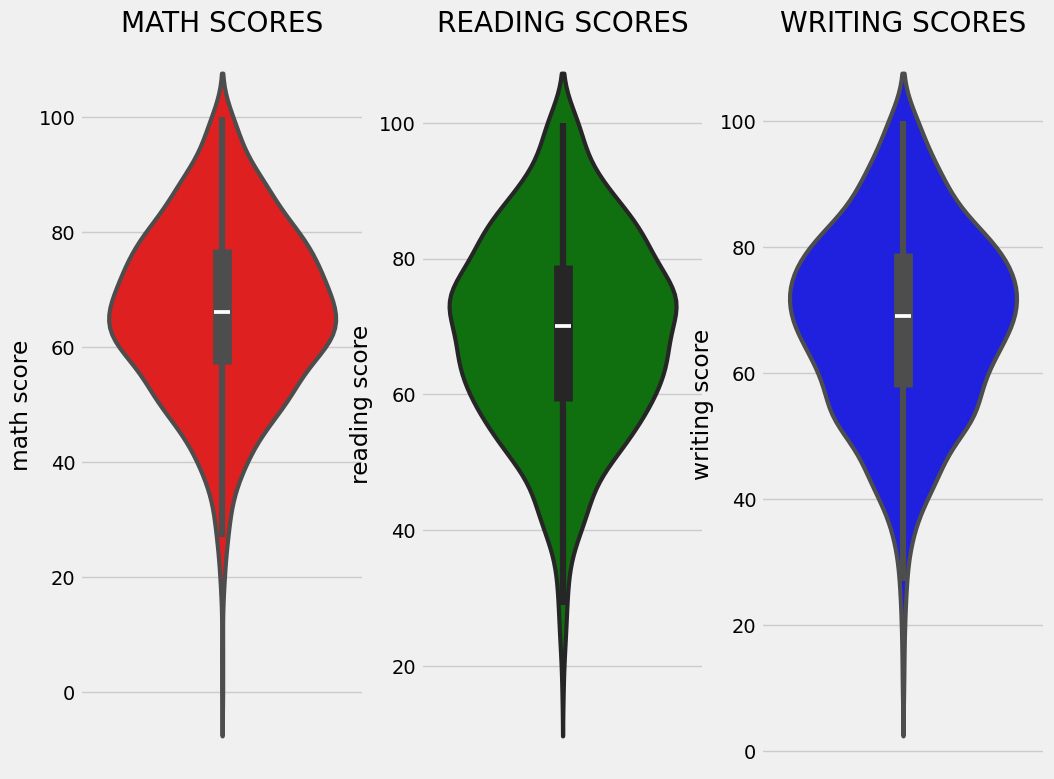

In [42]:

figsize=(18,8)
plt.subplot(1, 4, 1)
plt.title('MATH SCORES')
sns.violinplot(y='math score',data=df,color='red',linewidth=3)
plt.subplot(1, 4, 2)
plt.title('READING SCORES')
sns.violinplot(y='reading score',data=df,color='green',linewidth=3)
plt.subplot(1, 4, 3)
plt.title('WRITING SCORES')
sns.violinplot(y='writing score',data=df,color='blue',linewidth=3)
plt.show()

(-1.25, 1.25, -1.25, 1.25)

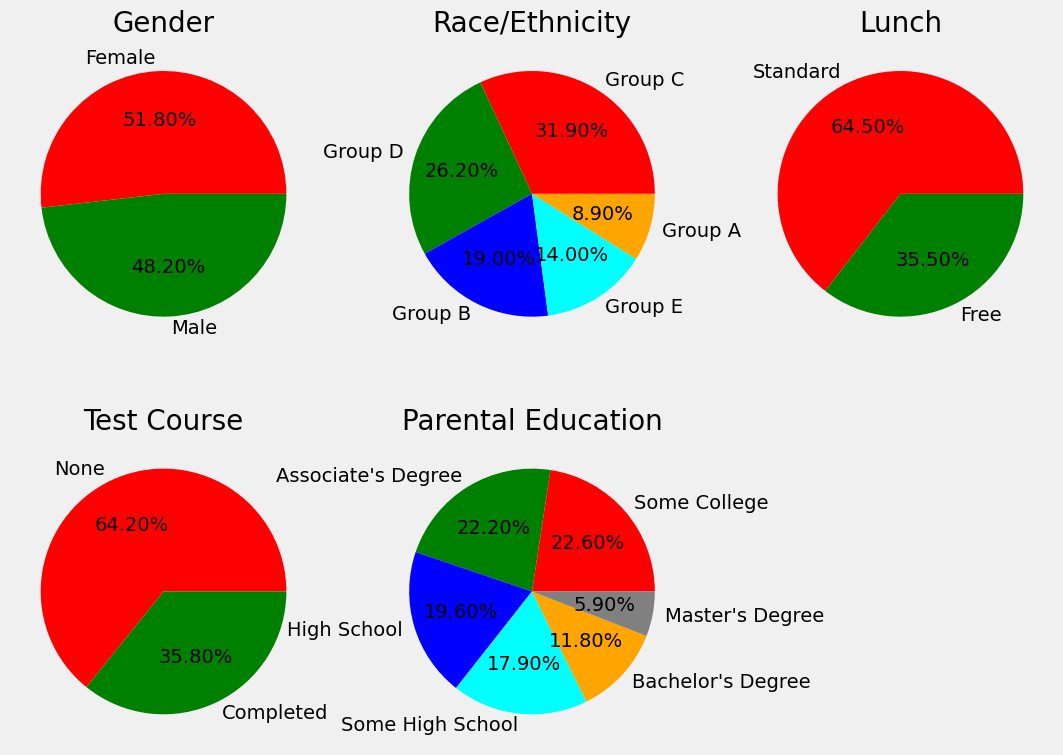

In [43]:

plt.rcParams['figure.figsize'] = (12, 9)


plt.subplot(2, 3, 1)
size = df['gender'].value_counts()
labels = 'Female', 'Male'
color = ['red','green']
plt.pie(size, colors=color, labels=labels, autopct='%.2f%%')
plt.title('Gender', fontsize=20)
plt.axis('off')

plt.subplot(2, 3, 2)
size = df['race/ethnicity'].value_counts()
labels = 'Group C', 'Group D', 'Group B', 'Group E', 'Group A'
color = ['red', 'green', 'blue', 'cyan', 'orange']
plt.pie(size, colors=color, labels=labels, autopct='%.2f%%')
plt.title('Race/Ethnicity', fontsize=20)
plt.axis('off')

plt.subplot(2, 3, 3)
size = df['lunch'].value_counts()
labels = 'Standard', 'Free'
color = ['red', 'green']
plt.pie(size, colors=color, labels=labels, autopct='%.2f%%')
plt.title('Lunch', fontsize=20)
plt.axis('off')


plt.subplot(2, 3, 4)
size = df['test preparation course'].value_counts()
labels = 'None', 'Completed'
color = ['red', 'green']
plt.pie(size, colors=color, labels=labels, autopct='%.2f%%')
plt.title('Test Course', fontsize=20)
plt.axis('off')

plt.subplot(2, 3, 5)
size = df['parental level of education'].value_counts()
labels = 'Some College', "Associate's Degree", 'High School', 'Some High School', "Bachelor's Degree", "Master's Degree"
color = ['red', 'green', 'blue', 'cyan', 'orange', 'grey']
plt.pie(size, colors=color, labels=labels, autopct='%.2f%%')
plt.title('Parental Education', fontsize=20)
plt.axis('off')

In [47]:
from sklearn.metrics import mean_squared_error, r2_score ,make_scorer
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression,Lasso
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error


In [51]:
!pip install catboost
from catboost import CatBoostRegressor
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn.model_selection import RandomizedSearchCV , GridSearchCV
import warnings

In [52]:
X = df.drop(columns="math score", axis=1)
y = df["math score"]


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


print(f"X_train shape: {X_train.shape}, y_train shape: {y_train.shape}")
print(f"X_test shape: {X_test.shape}, y_test shape: {y_test.shape}")


num_features = X.select_dtypes(exclude=["object"]).columns
cat_features = X.select_dtypes(include=["object"]).columns


numeric_transformer = StandardScaler()
oh_transformer = OneHotEncoder()

preprocessor = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, num_features),
        ("cat", oh_transformer, cat_features),
    ]
)


pipeline = Pipeline(steps=[('preprocessor', preprocessor)])

X_train_transformed = pipeline.fit_transform(X_train)
X_test_transformed = pipeline.transform(X_test)

print(f"Transformed X_train shape: {X_train_transformed.shape}")
print(f"Transformed X_test shape: {X_test_transformed.shape}")

models = {
    "Linear Regression": LinearRegression(),
    "Lasso": Lasso(),
    "K-Neighbors Regressor": KNeighborsRegressor(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest Regressor": RandomForestRegressor(),
    "Gradient Boosting": GradientBoostingRegressor(),
    "XGBRegressor": XGBRegressor(),
    "CatBoosting Regressor": CatBoostRegressor(verbose=False),
    "AdaBoost Regressor": AdaBoostRegressor()
}


def evaluate_model(true_values, predictions):
    mae = mean_absolute_error(true_values, predictions)
    mse = mean_squared_error(true_values, predictions)
    rmse = np.sqrt(mse)
    r2 = r2_score(true_values, predictions)
    return mae, mse, rmse, r2

model_list = []
r2_list = []


for model_name, model in models.items():
    print(f"Training {model_name}")
    model.fit(X_train_transformed, y_train)


    y_train_pred = model.predict(X_train_transformed)
    y_test_pred = model.predict(X_test_transformed)


    model_train_mae, model_train_mse, model_train_rmse, model_train_r2 = evaluate_model(y_train, y_train_pred)
    model_test_mae, model_test_mse, model_test_rmse, model_test_r2 = evaluate_model(y_test, y_test_pred)

    print(model_name)
    model_list.append(model_name)

    print('Model performance for Training set')
    print("- Root Mean Squared Error: {:.4f}".format(model_train_rmse))
    print("- Mean Squared Error: {:.4f}".format(model_train_mse))
    print("- Mean Absolute Error: {:.4f}".format(model_train_mae))
    print("- R2 Score: {:.4f}".format(model_train_r2))

    print('----------------------------------')
    print('Model performance for Test set')
    print("- Root Mean Squared Error: {:.4f}".format(model_test_rmse))
    print("- Mean Squared Error: {:.4f}".format(model_test_mse))
    print("- Mean Absolute Error: {:.4f}".format(model_test_mae))
    print("- R2 Score: {:.4f}".format(model_test_r2))

    r2_list.append(model_test_r2)
    print('=' * 35)
    print('\n')

X_train shape: (800, 7), y_train shape: (800,)
X_test shape: (200, 7), y_test shape: (200,)
Transformed X_train shape: (800, 19)
Transformed X_test shape: (200, 19)
Training Linear Regression
Linear Regression
Model performance for Training set
- Root Mean Squared Error: 5.3231
- Mean Squared Error: 28.3349
- Mean Absolute Error: 4.2667
- R2 Score: 0.8743
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 5.3940
- Mean Squared Error: 29.0952
- Mean Absolute Error: 4.2148
- R2 Score: 0.8804


Training Lasso
Lasso
Model performance for Training set
- Root Mean Squared Error: 6.5925
- Mean Squared Error: 43.4611
- Mean Absolute Error: 5.2053
- R2 Score: 0.8072
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 6.5173
- Mean Squared Error: 42.4756
- Mean Absolute Error: 5.1557
- R2 Score: 0.8254


Training K-Neighbors Regressor
K-Neighbors Regressor
Model performance for Training set
- Root Mean Squared Err

In [53]:
models = {
    "Linear Regression": LinearRegression(),
    "Lasso": Lasso(),
    "K-Neighbors Regressor": KNeighborsRegressor(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest Regressor": RandomForestRegressor(),
    "Gradient Boosting": GradientBoostingRegressor(),
    "XGBRegressor": XGBRegressor(),
    "CatBoosting Regressor": CatBoostRegressor(verbose=False),
    "AdaBoost Regressor": AdaBoostRegressor()
}

# Define hyperparameter ranges for each model
param_grid = {
    "Linear Regression": {},
    "Lasso": {"alpha": [1]},
    "K-Neighbors Regressor": {"n_neighbors": [3, 5, 7]},
    "Decision Tree": {"max_depth": [3, 5, 7], 'criterion': ['squared_error', 'friedman_mse', 'absolute_error', 'poisson']},
    "Random Forest Regressor": {'n_estimators': [8, 16, 32, 64, 128, 256], "max_depth": [3, 5, 7]},
    "Gradient Boosting": {'learning_rate': [0.1, 0.01, 0.05, 0.001], 'subsample': [0.6, 0.7, 0.75, 0.8, 0.85, 0.9],
                          'n_estimators': [8, 16, 32, 64, 128, 256]},
    "XGBRegressor": {'max_depth': [6, 8, 10], 'learning_rate': [0.01, 0.05, 0.1], 'n_estimators': [30, 50, 100]},
    "CatBoosting Regressor": {"iterations": [100, 500], "depth": [3, 5, 7]},
    "AdaBoost Regressor": {'learning_rate': [0.1, 0.01, 0.5, 0.001], 'n_estimators': [8, 16, 32, 64, 128, 256]}
}

model_list = []
r2_list = []

# Function to evaluate model
def evaluate_model(y_true, y_pred):
    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_true, y_pred)
    return mae, mse, rmse, r2

# Loop through models
for model_name, model in models.items():
    print(f"Training {model_name}")

    # Create a scorer object to use in grid search
    scorer = make_scorer(r2_score)

    # Perform grid search to find the best hyperparameters
    grid_search = GridSearchCV(
        estimator=Pipeline(steps=[('preprocessor', preprocessor), ('model', model)]),
        param_grid={'model__' + key: value for key, value in param_grid[model_name].items()},
        scoring=scorer,
        cv=5,
        n_jobs=-1
    )

    # Train the model
    grid_search.fit(X_train, y_train)

    # Make predictions
    y_train_pred = grid_search.predict(X_train)
    y_test_pred = grid_search.predict(X_test)

    # Evaluate Train and Test dataset
    model_train_mae, model_train_mse, model_train_rmse, model_train_r2 = evaluate_model(y_train, y_train_pred)
    model_test_mae, model_test_mse, model_test_rmse, model_test_r2 = evaluate_model(y_test, y_test_pred)

    # Print results
    print(model_name)
    model_list.append(model_name)

    print('Best hyperparameters:', grid_search.best_params_)
    print('Model performance for Training set')
    print("- Root Mean Squared Error: {:.4f}".format(model_train_rmse))
    print("- Mean Squared Error: {:.4f}".format(model_train_mse))
    print("- Mean Absolute Error: {:.4f}".format(model_train_mae))
    print("- R2 Score: {:.4f}".format(model_train_r2))

    print('----------------------------------')
    print('Model performance for Test set')
    print("- Root Mean Squared Error: {:.4f}".format(model_test_rmse))
    print("- Mean Squared Error: {:.4f}".format(model_test_mse))
    print("- Mean Absolute Error: {:.4f}".format(model_test_mae))
    print("- R2 Score: {:.4f}".format(model_test_r2))

    r2_list.append(model_test_r2)
    print('=' * 35)
    print('\n')

Training Linear Regression
Linear Regression
Best hyperparameters: {}
Model performance for Training set
- Root Mean Squared Error: 5.3231
- Mean Squared Error: 28.3349
- Mean Absolute Error: 4.2667
- R2 Score: 0.8743
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 5.3940
- Mean Squared Error: 29.0952
- Mean Absolute Error: 4.2148
- R2 Score: 0.8804


Training Lasso
Lasso
Best hyperparameters: {'model__alpha': 1}
Model performance for Training set
- Root Mean Squared Error: 6.5925
- Mean Squared Error: 43.4611
- Mean Absolute Error: 5.2053
- R2 Score: 0.8072
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 6.5173
- Mean Squared Error: 42.4756
- Mean Absolute Error: 5.1557
- R2 Score: 0.8254


Training K-Neighbors Regressor
K-Neighbors Regressor
Best hyperparameters: {'model__n_neighbors': 7}
Model performance for Training set
- Root Mean Squared Error: 5.8738
- Mean Squared Error: 34.5014
- Mean Ab

In [60]:
pd.DataFrame(list(zip(model_list, r2_list)), columns=['Model Name', 'R2_Score']).sort_values(by=["R2_Score"],ascending=False)

,Model Name,R2_Score
0,Linear Regression,0.880433
7,CatBoosting Regressor,0.875111
5,Gradient Boosting,0.872674
4,Random Forest Regressor,0.862793
8,AdaBoost Regressor,0.851509
6,XGBRegressor,0.847758
1,Lasso,0.825447
3,Decision Tree,0.824230
2,K-Neighbors Regressor,0.793060


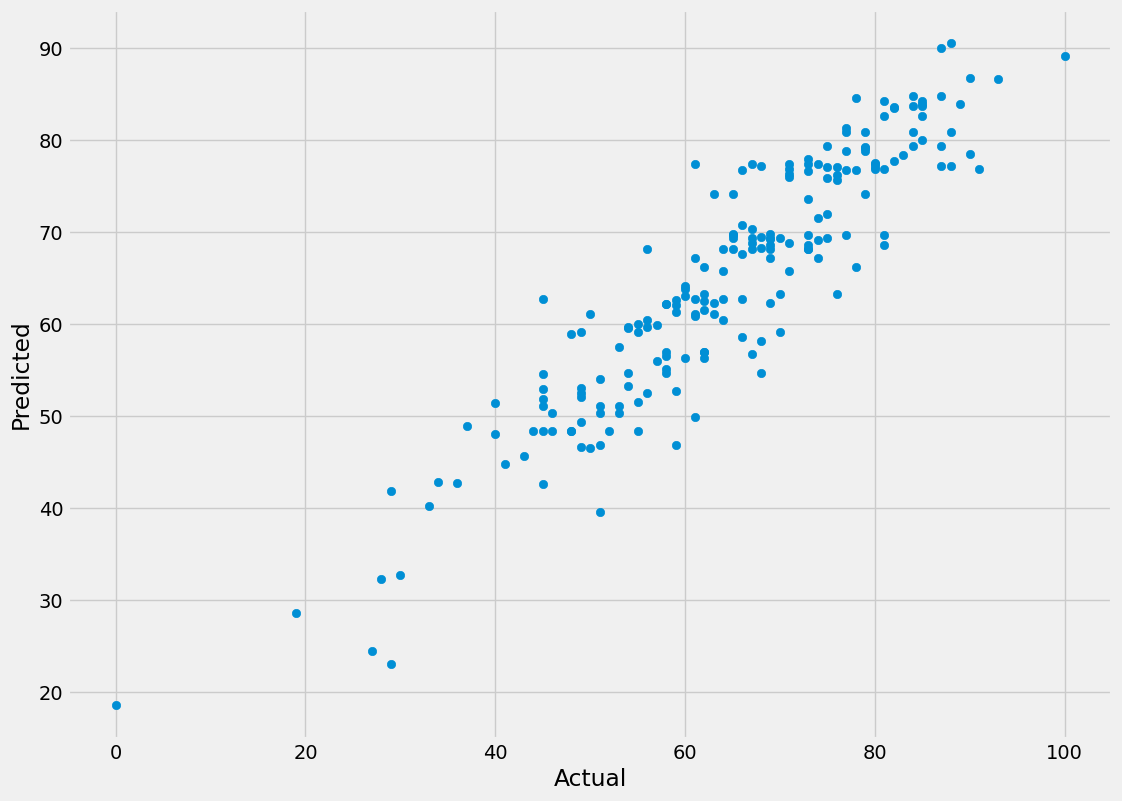

In [63]:
plt.scatter(y_test, y_test_pred)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.show()

<Axes: xlabel='math score'>

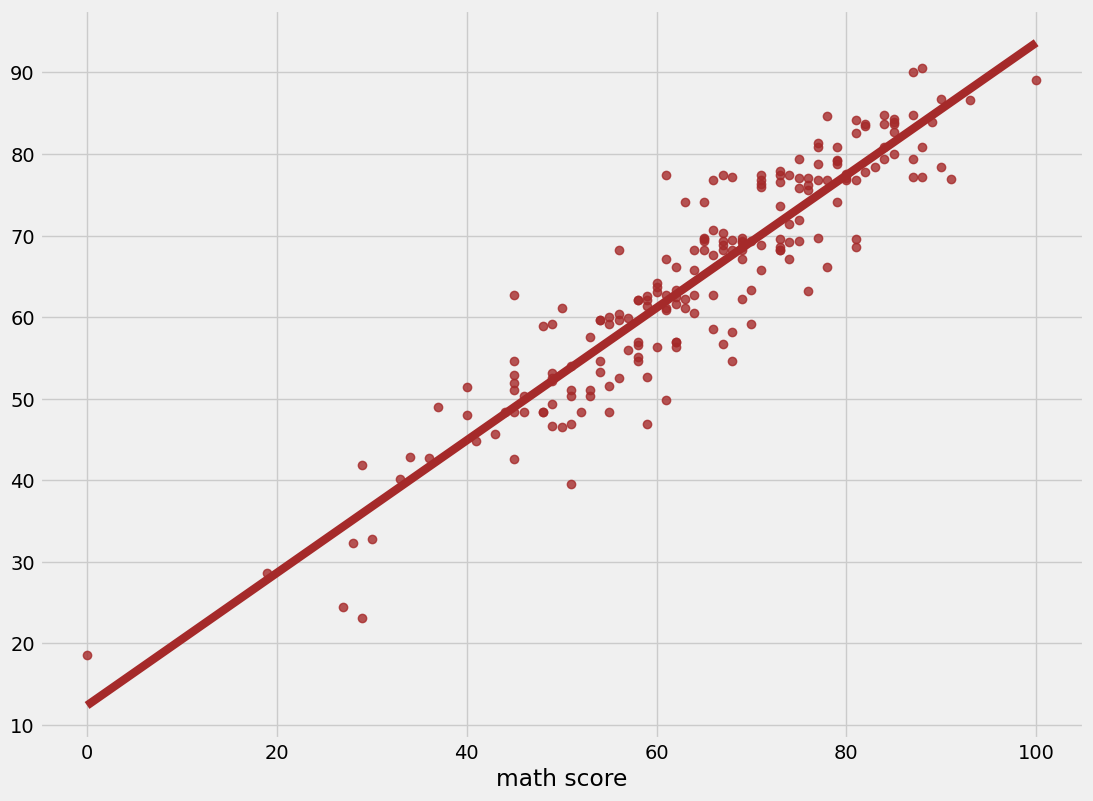

In [66]:
sns.regplot(x=y_test,y=y_test_pred,ci=None,color ='brown')

In [68]:
pred_df=pd.DataFrame({'Actual Value':y_test,'Predicted Value':y_test_pred,'Difference':y_test-y_test_pred})
pred_df

,Actual Value,Predicted Value,Difference
521,91,76.884058,14.115942
737,53,57.515924,-4.515924
740,80,77.394737,2.605263
660,74,77.394737,-3.394737
411,84,83.734375,0.265625
...,...,...,...
408,52,48.393443,3.606557
332,62,56.297872,5.702128
208,74,67.153005,6.846995
613,65,68.176471,-3.176471
